In [1]:
# Main imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Leitura do arquivo "aerogerador.dat"
df = pd.read_csv('aerogerador.dat', sep='\s+', header=None, names=['velocidade_vento', 'potencia_gerada'])
df

,velocidade_vento,potencia_gerada
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
2245,14.0,508
2246,14.0,508
2247,14.1,508
2248,14.3,508


Text(0.5, 1.0, 'Velocidade do Vento vs Potência Gerada')

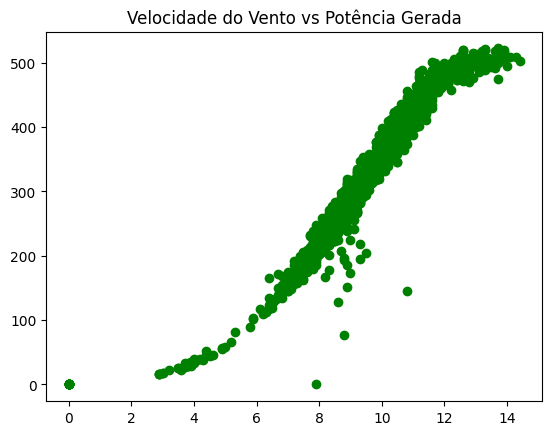

In [3]:
# Passo 1: Visualizando os dados em um grafico de espalhamento
plt.scatter(df['velocidade_vento'], df['potencia_gerada'], color='green')
plt.title('Velocidade do Vento vs Potência Gerada')

In [4]:
# Passo 2: Dividindo os dados em variáveis independentes e dependentes
X = df['velocidade_vento'].values
y = df['potencia_gerada'].values.reshape(-1, 1)

X.shape, y.shape

((2250,), (2250, 1))

In [5]:
# Passo 3: Definindo as rodadas de treinamento e teste
EPOCHS = 1000

In [6]:
# Passo 4: Definição dos metodos: MQO, MQO regularizado (Tikhonov) e media de valores observaveis
def MQO(X, y):
    theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    return theta_best

def MQO_regularizado(X, y, alpha= 1):
    theta_best = np.linalg.inv(X.T.dot(X) + alpha * np.eye(X.shape[1])).dot(X.T).dot(y)

    return theta_best
    
def media_valores_observaveis(y):
    return np.mean(y)

In [7]:
# Passo 5: Encontrar o valor de alpha atraves do EQM
def EQM(y, y_pred):
    return np.mean((y - y_pred) ** 2)



In [8]:
# Passo 6: Embaralhar as amostras do modelo com proporção de 80% para treino e 20% para teste
from sklearn.model_selection import train_test_split

X = df.drop('potencia_gerada', axis=1).values
y = df['potencia_gerada'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(array([[ 8. ],
        [ 9.1],
        [12. ],
        ...,
        [ 8.9],
        [ 9.2],
        [ 8.5]]),
 array([[ 8.6],
        [ 8. ],
        [ 8.1],
        [ 7.6],
        [10.1],
        [10.1],
        [11.2],
        [ 8.1],
        [10.2],
        [ 9.4],
        [ 7.8],
        [ 9.5],
        [ 9.7],
        [11.7],
        [ 9.1],
        [ 9.9],
        [ 8.3],
        [12.2],
        [ 8.7],
        [ 9.8],
        [ 7.8],
        [ 8.2],
        [ 9.1],
        [ 9.2],
        [11.7],
        [11.1],
        [ 8.3],
        [ 7.8],
        [11.5],
        [ 7.8],
        [ 9.2],
        [ 8.6],
        [ 8.5],
        [ 8.6],
        [ 9. ],
        [ 8.3],
        [12. ],
        [10.4],
        [ 8.5],
        [10.1],
        [ 7.2],
        [11.4],
        [ 8.8],
        [ 7. ],
        [11.8],
        [12.6],
        [ 9.4],
        [ 9.3],
        [ 8. ],
        [10.7],
        [ 9.5],
        [ 6.9],
        [11.2],
        [12.2],
        [11.2],
        [

# 

In [14]:

# Instanciando as listas para armazenar os resultados
mqo_eqm_list = []
mqo_regularizado_eqm_list = []
media_valores_observaveis_eqm_list = []

# Iterando pelas 1000 epochs
for _ in range(1000):
    # Realizando o split entre treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Forward pass pelos modelos (MQO, MQO_regularizado, media_valores_observaveis)
    mqo_result = MQO(X_train, y_train)
    mqo_regularizado_result = MQO_regularizado(X_train, y_train)
    media_valores_observaveis_result = media_valores_observaveis(y_train)

    # Predicoes dos modelos
    y_pred_mqo = X_test.dot(mqo_result)
    y_pred_mqo_regularizado = X_test.dot(mqo_regularizado_result)
    y_pred_media_valores_observaveis = np.full(y_test.shape, media_valores_observaveis_result)

    # Calculando o EQM dos modelos e salvando nas listas
    eqm_mqo = EQM(y_test, y_pred_mqo)
    eqm_mqo_regularizado = EQM(y_test, y_pred_mqo_regularizado)
    eqm_media_valores_observaveis = EQM(y_test, y_pred_media_valores_observaveis)

    # Adicionando os resultados nas listas
    mqo_eqm_list.append(eqm_mqo)
    mqo_regularizado_eqm_list.append(eqm_mqo_regularizado)
    media_valores_observaveis_eqm_list.append(eqm_media_valores_observaveis)
    


In [15]:
# Funcao para plotar o grafico
def calculate_and_plot_eqm(eqm_list, title):
    # Plotando o grafico
    plt.hist(eqm_list, bins=30, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('EQM')
    plt.ylabel('Frequência')
    plt.show()

    

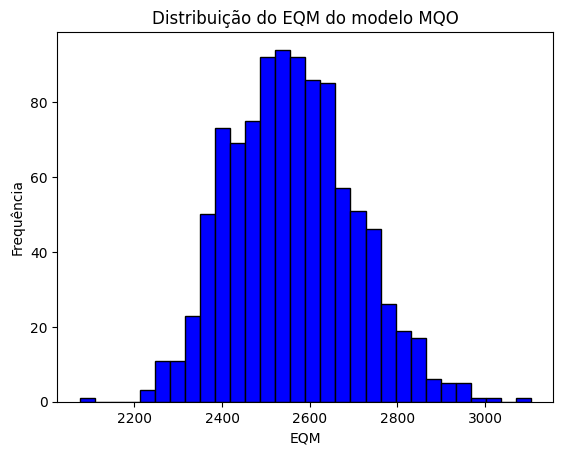

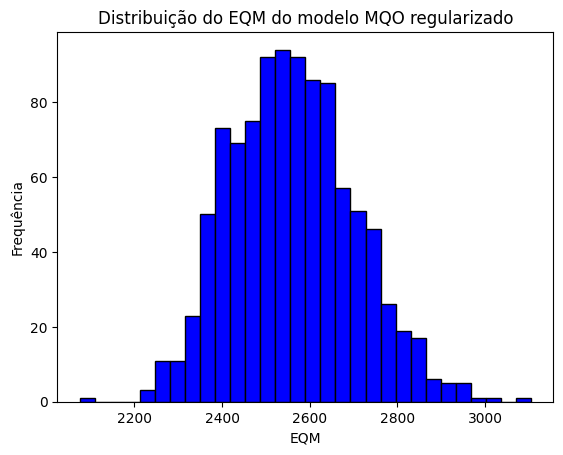

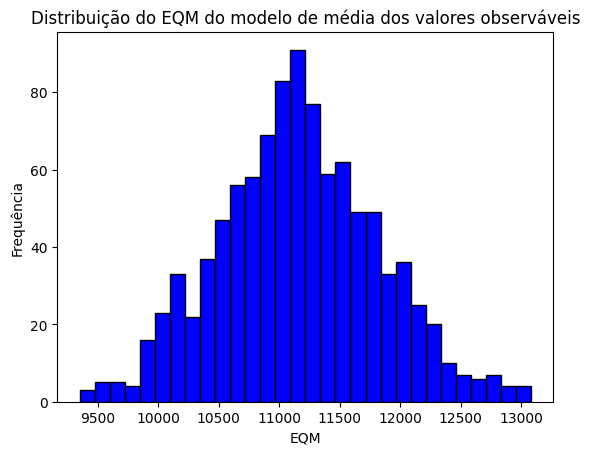

In [16]:
# Chamando a funcao para cada modelo
calculate_and_plot_eqm(mqo_eqm_list, 'Distribuição do EQM do modelo MQO')
calculate_and_plot_eqm(mqo_regularizado_eqm_list, 'Distribuição do EQM do modelo MQO regularizado')
calculate_and_plot_eqm(media_valores_observaveis_eqm_list, 'Distribuição do EQM do modelo de média dos valores observáveis')

In [17]:
# Gerando as estatisticas de cada modelo (MQO, MQO regularizado, media_valores_observaveis)
# Media de cada modelo
mqo_mean = np.mean(mqo_eqm_list)
mqo_regularizado_mean = np.mean(mqo_regularizado_eqm_list)
media_valores_observaveis_mean = np.mean(media_valores_observaveis_eqm_list)

# Desvio padrao de cada modelo
mqo_std = np.std(mqo_eqm_list)
mqo_regularizado_std = np.std(mqo_regularizado_eqm_list)
media_valores_observaveis_std = np.std(media_valores_observaveis_eqm_list)

# Maximo de cada modelo
mqo_max = np.max(mqo_eqm_list)
mqo_regularizado_max = np.max(mqo_regularizado_eqm_list)
media_valores_observaveis_max = np.max(media_valores_observaveis_eqm_list)

# Minimo de cada modelo
mqo_min = np.min(mqo_eqm_list)
mqo_regularizado_min = np.min(mqo_regularizado_eqm_list)
media_valores_observaveis_min = np.min(media_valores_observaveis_eqm_list)

# Exibindo as estatisticas
print(f'MQO Mean: {mqo_mean} - MQO Regularizado Mean: {mqo_regularizado_mean} - Media Valores Observaveis Mean: {media_valores_observaveis_mean}')
print(f'MQO STD: {mqo_std} - MQO Regularizado STD: {mqo_regularizado_std} - Media Valores Observaveis STD: {media_valores_observaveis_std}')
print(f'MQO Max: {mqo_max} - MQO Regularizado Max: {mqo_regularizado_max} - Media Valores Observaveis Max: {media_valores_observaveis_max}')
print(f'MQO Min: {mqo_min} - MQO Regularizado Min: {mqo_regularizado_min} - Media Valores Observaveis Min: {media_valores_observaveis_min}')


MQO Mean: 2560.5626584056645 - MQO Regularizado Mean: 2560.5631042899286 - Media Valores Observaveis Mean: 11158.863351814816
MQO STD: 141.13746712514433 - MQO Regularizado STD: 141.1380765278961 - Media Valores Observaveis STD: 659.6146852960004
MQO Max: 3104.793567902308 - MQO Regularizado Max: 3104.7815013488557 - Media Valores Observaveis Max: 13078.228642283952
MQO Min: 2075.6508499572 - MQO Regularizado Min: 2075.637621939757 - Media Valores Observaveis Min: 9354.324304012345


In [18]:
# Colocando os resultados em um DataFrame
df_results = pd.DataFrame({
    'Modelo': ['MQO', 'MQO Regularizado', 'Media Valores Observaveis'],
    'Média': [mqo_mean, mqo_regularizado_mean, media_valores_observaveis_mean],
    'Desvio Padrão': [mqo_std, mqo_regularizado_std, media_valores_observaveis_std],
    'Máximo': [mqo_max, mqo_regularizado_max, media_valores_observaveis_max],
    'Mínimo': [mqo_min, mqo_regularizado_min, media_valores_observaveis_min]
})
df_results

,Modelo,Média,Desvio Padrão,Máximo,Mínimo
0,MQO,2560.562658,141.137467,3104.793568,2075.650850
1,MQO Regularizado,2560.563104,141.138077,3104.781501,2075.637622
2,Media Valores Observaveis,11158.863352,659.614685,13078.228642,9354.324304
